# 1. Data Preprocessing

## Download Dataset

In [1]:
! wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00515/data.zip"

--2022-07-20 15:51:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/00515/data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160343356 (153M) [application/x-httpd-php]
Saving to: ‘data.zip’

data.zip            100%[===================>] 152.92M  80.5MB/s    in 1.9s    

2022-07-20 15:51:51 (80.5 MB/s) - ‘data.zip’ saved [160343356/160343356]



In [2]:
! unzip data.zip -d source_data

Archive:  data.zip
  inflating: source_data/all_accelerometer_data_pids_13.csv  
   creating: source_data/clean_tac/
  inflating: source_data/clean_tac/DK3500_clean_TAC.csv  
  inflating: source_data/clean_tac/JR8022_clean_TAC.csv  
  inflating: source_data/clean_tac/SA0297_clean_TAC.csv  
  inflating: source_data/clean_tac/BU4707_clean_TAC.csv  
  inflating: source_data/clean_tac/HV0618_clean_TAC.csv  
  inflating: source_data/clean_tac/SF3079_clean_TAC.csv  
  inflating: source_data/clean_tac/MJ8002_clean_TAC.csv  
  inflating: source_data/clean_tac/CC6740_clean_TAC.csv  
  inflating: source_data/clean_tac/PC6771_clean_TAC.csv  
  inflating: source_data/clean_tac/MC7070_clean_TAC.csv  
  inflating: source_data/clean_tac/DC6359_clean_TAC.csv  
  inflating: source_data/clean_tac/BK7610_clean_TAC.csv  
  inflating: source_data/clean_tac/JB3156_clean_TAC.csv  
  inflating: source_data/phone_types.csv  
  inflating: source_data/pids.txt    
   creating: source_data/raw_tac/
  inflating: s

## Handle Imports

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout 
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Load TAC Data for given PID

In [4]:
pid = "MJ8002"

In [5]:
tac_data = pd.read_csv('./source_data/clean_tac/' + pid + '_clean_TAC.csv')
tac_data

,timestamp,TAC_Reading
0,1493720054,-0.001385
1,1493721878,0.000864
2,1493722199,0.001913
3,1493722520,0.001333
4,1493722842,-0.000256
5,1493723162,-0.001605
6,1493723482,-0.001682
7,1493723802,-0.000398
8,1493724122,0.001296
9,1493724443,0.002063


## Load Accelerometer Data in X, Y, Z dimensions for given pid

In [6]:
xyz_data = pd.read_csv("./source_data/all_accelerometer_data_pids_13.csv")
xyz_data = xyz_data.loc[xyz_data['pid'] == pid]
xyz_data.head()

,time,pid,x,y,z
154027,1493736949591,MJ8002,0.0025,0.0043,-0.0027
154031,1493736949616,MJ8002,-0.0003,-0.0013,-0.0051
154035,1493736949641,MJ8002,0.0022,0.0014,-0.0027
154039,1493736949665,MJ8002,0.0006,-0.0010,-0.0047
154043,1493736949691,MJ8002,0.0009,-0.0005,-0.0055


In [7]:
xyz_data.drop("pid", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
xyz_data = xyz_data.reset_index()
xyz_data.drop("index", axis=1, inplace=True)

In [9]:
xyz_data.head()

,time,x,y,z
0,1493736949591,0.0025,0.0043,-0.0027
1,1493736949616,-0.0003,-0.0013,-0.0051
2,1493736949641,0.0022,0.0014,-0.0027
3,1493736949665,0.0006,-0.0010,-0.0047
4,1493736949691,0.0009,-0.0005,-0.0055


## Convert timestamp readings from millisecond to second

In [10]:
def millisec_to_sec(t):
    return int(t/1000)

In [11]:
xyz_data_sec = xyz_data
xyz_data_sec['time_sec'] = xyz_data_sec['time'].apply(millisec_to_sec)

In [12]:
xyz_data_sec.head()

,time,x,y,z,time_sec
0,1493736949591,0.0025,0.0043,-0.0027,1493736949
1,1493736949616,-0.0003,-0.0013,-0.0051,1493736949
2,1493736949641,0.0022,0.0014,-0.0027,1493736949
3,1493736949665,0.0006,-0.0010,-0.0047,1493736949
4,1493736949691,0.0009,-0.0005,-0.0055,1493736949


## Sub-listing accelerometer readings between 30-min TAC intervals & combining both readings into common DataFrame

In [13]:
times = tac_data['timestamp'].to_list()
tacs = tac_data['TAC_Reading'].to_list()

dataframe = pd.DataFrame(columns=['pid', 'range_start_tac', 'range_end_tac', 'tac', 'time_acc', 'x', 'y', 'z', 'time_acc_sec'])

for i in range(0, len(times) - 1):
    start_range = times[i]
    end_range = times[i+1]
    try:
        check_range = xyz_data_sec['time_sec'].between(start_range, end_range, inclusive='neither')
        check_range.to_list().index(True)
        # if above check passes that means values exists from start and end range
        
        # temp adding check_range so we can sublist out entries
        temp_xyz = xyz_data_sec
        temp_xyz['contains'] = check_range
        temp_xyz = temp_xyz.loc[temp_xyz['contains'] == True]
        
        # using as buffer
        temp_xyz = temp_xyz.assign(range_start_tac = start_range)
        temp_xyz = temp_xyz.assign(range_end_tac = end_range)
        temp_xyz = temp_xyz.assign(tac = tacs[i])
        temp_xyz = temp_xyz.assign(pid=pid)

        # print(temp_xyz.head()) # time x y z time_sec contains
        print(len(temp_xyz), len(check_range))
        # sum = sum + len(temp_xyz)
        temp_dataframe = pd.DataFrame()
        temp_dataframe['pid'] = temp_xyz['pid']
        temp_dataframe['range_start_tac'] = temp_xyz['range_start_tac']
        temp_dataframe['range_end_tac'] = temp_xyz['range_end_tac']
        temp_dataframe['tac'] = temp_xyz['tac']
        temp_dataframe['time_acc'] = temp_xyz['time']
        temp_dataframe['x'] = temp_xyz['x']
        temp_dataframe['y'] = temp_xyz['y']
        temp_dataframe['z'] = temp_xyz['z']
        temp_dataframe['time_acc_sec'] = temp_xyz['time'].apply(millisec_to_sec)
        # print(temp_dataframe.head())
        dataframe = pd.concat(objs=[dataframe, temp_dataframe])
        # dataframe = dataframe.concat(temp_dataframe, ignore_index)
    except:
        pass

12979 631303
63976 631303
73615 631303
5175 631303
72005 631303
73006 631303
73615 631303
53961 631303
15865 631303
41034 631303
2995 631303
23983 631303
73556 631303
45218 631303


In [14]:
dataframe.head()

,pid,range_start_tac,range_end_tac,tac,time_acc,x,y,z,time_acc_sec
0,MJ8002,1493736009,1493737832,0.00115,1493736949591,0.0025,0.0043,-0.0027,1493736949
1,MJ8002,1493736009,1493737832,0.00115,1493736949616,-0.0003,-0.0013,-0.0051,1493736949
2,MJ8002,1493736009,1493737832,0.00115,1493736949641,0.0022,0.0014,-0.0027,1493736949
3,MJ8002,1493736009,1493737832,0.00115,1493736949665,0.0006,-0.0010,-0.0047,1493736949
4,MJ8002,1493736009,1493737832,0.00115,1493736949691,0.0009,-0.0005,-0.0055,1493736949


## Exporting the combined DataFrame to a csv file

In [15]:
dataframe.to_csv(pid + ".csv")

## Normalizing the TAC readings as per given threshold value

In [16]:
def normalize_tac(t):
    if t >= 0.08: # setting a threshold for TAC readings
        return 1
    else:
        return 0

In [17]:
dataframe['tac'] = dataframe['tac'].apply(normalize_tac)

In [18]:
dataframe.head()

,pid,range_start_tac,range_end_tac,tac,time_acc,x,y,z,time_acc_sec
0,MJ8002,1493736009,1493737832,0,1493736949591,0.0025,0.0043,-0.0027,1493736949
1,MJ8002,1493736009,1493737832,0,1493736949616,-0.0003,-0.0013,-0.0051,1493736949
2,MJ8002,1493736009,1493737832,0,1493736949641,0.0022,0.0014,-0.0027,1493736949
3,MJ8002,1493736009,1493737832,0,1493736949665,0.0006,-0.0010,-0.0047,1493736949
4,MJ8002,1493736009,1493737832,0,1493736949691,0.0009,-0.0005,-0.0055,1493736949


## Identifying the Unique Timestamps

In [19]:
uniq_time_stamps = dataframe['time_acc_sec'].unique()
uniq_time_stamps

array([1493736949, 1493736950, 1493736951, ..., 1493784949, 1493784950,
       1493784951], dtype=object)

## Picking only first 20 instances of accelerometer readings per second

In [20]:
dataframe_new = pd.DataFrame(columns=['pid', 'range_start_tac', 'range_end_tac', 'tac', 'time_acc', 'x', 'y', 'z', 'time_acc_sec'])

for stamp in uniq_time_stamps:
    temp = dataframe.loc[dataframe['time_acc_sec'] == stamp]
    to_add = temp.head(20) # defining the number of instances to keep per second
    dataframe_new = pd.concat(objs=[dataframe_new, to_add])

In [21]:
dataframe_new.head(40)

,pid,range_start_tac,range_end_tac,tac,time_acc,x,y,z,time_acc_sec
0,MJ8002,1493736009,1493737832,0,1493736949591,0.0025,0.0043,-0.0027,1493736949
1,MJ8002,1493736009,1493737832,0,1493736949616,-0.0003,-0.0013,-0.0051,1493736949
2,MJ8002,1493736009,1493737832,0,1493736949641,0.0022,0.0014,-0.0027,1493736949
3,MJ8002,1493736009,1493737832,0,1493736949665,0.0006,-0.0010,-0.0047,1493736949
4,MJ8002,1493736009,1493737832,0,1493736949691,0.0009,-0.0005,-0.0055,1493736949
5,MJ8002,1493736009,1493737832,0,1493736949716,0.0004,0.0050,-0.0035,1493736949
6,MJ8002,1493736009,1493737832,0,1493736949765,0.0001,0.0048,-0.0031,1493736949
7,MJ8002,1493736009,1493737832,0,1493736949766,0.0001,0.0011,-0.0057,1493736949
8,MJ8002,1493736009,1493737832,0,1493736949790,0.0013,-0.0002,-0.0057,1493736949
9,MJ8002,1493736009,1493737832,0,1493736949815,0.0002,-0.0022,-0.0030,1493736949


In [22]:
dataframe_new.to_csv("processed_" + pid + "_window.csv")

In [23]:
dataframe_new.shape

(315691, 9)

In [25]:
dataframe_new = pd.read_csv("processed_" + pid + "_window.csv")

## Listing only those readings with TAC value above set threshold classifying as "Drunk"

In [26]:
drunk = dataframe_new.loc[dataframe_new['tac'] == 1]

## Listing only those readings with TAC value below set threshold classifying as "Not Drunk"

In [27]:
notdrunk = dataframe_new.loc[dataframe_new['tac'] == 0]

## Exporting both DataFrames with Drunk and Not Drunk values to separate csv files

In [28]:
drunk

,Unnamed: 0,pid,range_start_tac,range_end_tac,tac,time_acc,x,y,z,time_acc_sec
75337,150650,MJ8002,1493746991,1493748833,1,1493746992001,-0.0008,-0.0004,-0.0028,1493746992
75338,150651,MJ8002,1493746991,1493748833,1,1493746992027,0.0017,-0.0005,-0.0030,1493746992
75339,150652,MJ8002,1493746991,1493748833,1,1493746992052,-0.0011,-0.0001,-0.0021,1493746992
75340,150653,MJ8002,1493746991,1493748833,1,1493746992077,-0.0001,-0.0004,-0.0019,1493746992
75341,150654,MJ8002,1493746991,1493748833,1,1493746992107,0.0017,0.0011,-0.0043,1493746992
...,...,...,...,...,...,...,...,...,...,...
244265,488450,MJ8002,1493767248,1493769092,1,1493768605376,-0.0733,-0.1473,0.1727,1493768605
244266,488451,MJ8002,1493767248,1493769092,1,1493768605401,0.0269,-0.1601,0.1525,1493768605
244267,488452,MJ8002,1493767248,1493769092,1,1493768605425,0.2667,-0.1914,0.0955,1493768605
244268,488453,MJ8002,1493767248,1493769092,1,1493768605451,0.3787,-0.1690,0.1245,1493768605


In [29]:
drunk.to_csv("drunk_" + pid + ".csv")

In [30]:
notdrunk

,Unnamed: 0,pid,range_start_tac,range_end_tac,tac,time_acc,x,y,z,time_acc_sec
0,0,MJ8002,1493736009,1493737832,0,1493736949591,0.0025,0.0043,-0.0027,1493736949
1,1,MJ8002,1493736009,1493737832,0,1493736949616,-0.0003,-0.0013,-0.0051,1493736949
2,2,MJ8002,1493736009,1493737832,0,1493736949641,0.0022,0.0014,-0.0027,1493736949
3,3,MJ8002,1493736009,1493737832,0,1493736949665,0.0006,-0.0010,-0.0047,1493736949
4,4,MJ8002,1493736009,1493737832,0,1493736949691,0.0009,-0.0005,-0.0055,1493736949
...,...,...,...,...,...,...,...,...,...,...
315686,631278,MJ8002,1493783820,1493785666,0,1493784951385,0.0011,0.0003,-0.0037,1493784951
315687,631279,MJ8002,1493783820,1493785666,0,1493784951411,-0.0024,-0.0013,-0.0062,1493784951
315688,631280,MJ8002,1493783820,1493785666,0,1493784951436,0.0000,-0.0016,-0.0048,1493784951
315689,631281,MJ8002,1493783820,1493785666,0,1493784951462,0.0000,-0.0008,-0.0041,1493784951


In [31]:
notdrunk.to_csv("notdrunk_" + pid + ".csv")

## Reading extracted csv files for model training

In [37]:
drunk = pd.read_csv("drunk_" + pid + ".csv", index_col=False)
notdrunk = pd.read_csv("notdrunk_" + pid + ".csv", index_col=False)

In [38]:
notdrunk.head()

,Unnamed: 0,Unnamed: 0.1,pid,range_start_tac,range_end_tac,tac,time_acc,x,y,z,time_acc_sec
0,0,0,MJ8002,1493736009,1493737832,0,1493736949591,0.0025,0.0043,-0.0027,1493736949
1,1,1,MJ8002,1493736009,1493737832,0,1493736949616,-0.0003,-0.0013,-0.0051,1493736949
2,2,2,MJ8002,1493736009,1493737832,0,1493736949641,0.0022,0.0014,-0.0027,1493736949
3,3,3,MJ8002,1493736009,1493737832,0,1493736949665,0.0006,-0.0010,-0.0047,1493736949
4,4,4,MJ8002,1493736009,1493737832,0,1493736949691,0.0009,-0.0005,-0.0055,1493736949


In [39]:
drunk.head()

,Unnamed: 0,Unnamed: 0.1,pid,range_start_tac,range_end_tac,tac,time_acc,x,y,z,time_acc_sec
0,75337,150650,MJ8002,1493746991,1493748833,1,1493746992001,-0.0008,-0.0004,-0.0028,1493746992
1,75338,150651,MJ8002,1493746991,1493748833,1,1493746992027,0.0017,-0.0005,-0.0030,1493746992
2,75339,150652,MJ8002,1493746991,1493748833,1,1493746992052,-0.0011,-0.0001,-0.0021,1493746992
3,75340,150653,MJ8002,1493746991,1493748833,1,1493746992077,-0.0001,-0.0004,-0.0019,1493746992
4,75341,150654,MJ8002,1493746991,1493748833,1,1493746992107,0.0017,0.0011,-0.0043,1493746992


## Dropping irrelevant columns from the loaded DataFrames simultaneously

In [40]:
all_frames = [drunk, notdrunk]
for frame in all_frames:
    frame.drop("pid", axis=1, inplace=True)
    frame.drop("range_start_tac", axis=1, inplace=True)
    frame.drop("range_end_tac", axis=1, inplace=True)
    frame.drop("time_acc_sec", axis=1, inplace=True)
    frame.drop('Unnamed: 0', axis =1, inplace=True)
    frame.drop('Unnamed: 0.1', axis =1, inplace=True)

In [41]:
drunk

,tac,time_acc,x,y,z
0,1,1493746992001,-0.0008,-0.0004,-0.0028
1,1,1493746992027,0.0017,-0.0005,-0.0030
2,1,1493746992052,-0.0011,-0.0001,-0.0021
3,1,1493746992077,-0.0001,-0.0004,-0.0019
4,1,1493746992107,0.0017,0.0011,-0.0043
...,...,...,...,...,...
96387,1,1493768605376,-0.0733,-0.1473,0.1727
96388,1,1493768605401,0.0269,-0.1601,0.1525
96389,1,1493768605425,0.2667,-0.1914,0.0955
96390,1,1493768605451,0.3787,-0.1690,0.1245


In [42]:
notdrunk

,tac,time_acc,x,y,z
0,0,1493736949591,0.0025,0.0043,-0.0027
1,0,1493736949616,-0.0003,-0.0013,-0.0051
2,0,1493736949641,0.0022,0.0014,-0.0027
3,0,1493736949665,0.0006,-0.0010,-0.0047
4,0,1493736949691,0.0009,-0.0005,-0.0055
...,...,...,...,...,...
219294,0,1493784951385,0.0011,0.0003,-0.0037
219295,0,1493784951411,-0.0024,-0.0013,-0.0062
219296,0,1493784951436,0.0000,-0.0016,-0.0048
219297,0,1493784951462,0.0000,-0.0008,-0.0041


## Normalizing values for separated csv files

In [43]:
size_data_normal = min(len(notdrunk.index), len(drunk.index)) # specifies number of rows to take for each data
## !! Should be smaller or equal to minimum of size of both data frames

In [44]:
notdrunk_normalised = notdrunk.head(size_data_normal)
notdrunk_normalised

,tac,time_acc,x,y,z
0,0,1493736949591,0.0025,0.0043,-0.0027
1,0,1493736949616,-0.0003,-0.0013,-0.0051
2,0,1493736949641,0.0022,0.0014,-0.0027
3,0,1493736949665,0.0006,-0.0010,-0.0047
4,0,1493736949691,0.0009,-0.0005,-0.0055
...,...,...,...,...,...
96387,0,1493757304228,-0.0571,-0.0671,-0.0038
96388,0,1493757304255,-0.0984,-0.0623,0.0460
96389,0,1493757304278,-0.0952,-0.0038,0.0687
96390,0,1493757304302,-0.0744,0.0052,0.0751


In [45]:
drunk_normalised = drunk.head(size_data_normal)
drunk_normalised

,tac,time_acc,x,y,z
0,1,1493746992001,-0.0008,-0.0004,-0.0028
1,1,1493746992027,0.0017,-0.0005,-0.0030
2,1,1493746992052,-0.0011,-0.0001,-0.0021
3,1,1493746992077,-0.0001,-0.0004,-0.0019
4,1,1493746992107,0.0017,0.0011,-0.0043
...,...,...,...,...,...
96387,1,1493768605376,-0.0733,-0.1473,0.1727
96388,1,1493768605401,0.0269,-0.1601,0.1525
96389,1,1493768605425,0.2667,-0.1914,0.0955
96390,1,1493768605451,0.3787,-0.1690,0.1245


## Combining the normalized files into a single DataFrame

In [46]:
columns = ['tac', 'time_acc', 'x', 'y', 'z']
data = pd.concat(objs=[drunk, notdrunk_normalised])
data

,tac,time_acc,x,y,z
0,1,1493746992001,-0.0008,-0.0004,-0.0028
1,1,1493746992027,0.0017,-0.0005,-0.0030
2,1,1493746992052,-0.0011,-0.0001,-0.0021
3,1,1493746992077,-0.0001,-0.0004,-0.0019
4,1,1493746992107,0.0017,0.0011,-0.0043
...,...,...,...,...,...
96387,0,1493757304228,-0.0571,-0.0671,-0.0038
96388,0,1493757304255,-0.0984,-0.0623,0.0460
96389,0,1493757304278,-0.0952,-0.0038,0.0687
96390,0,1493757304302,-0.0744,0.0052,0.0751


## Checking the information of each column in DataFrame

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192784 entries, 0 to 96391
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   tac       192784 non-null  int64  
 1   time_acc  192784 non-null  int64  
 2   x         192784 non-null  float64
 3   y         192784 non-null  float64
 4   z         192784 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 8.8 MB


## Checking if any null values are present in any column of the DataFrame

In [48]:
data.isnull().sum()

tac         0
time_acc    0
x           0
y           0
z           0
dtype: int64

## Printing count of each value for 'TAC reading' column in DataFrame

In [49]:
data['tac'].value_counts()

1    96392
0    96392
Name: tac, dtype: int64

In [50]:
tacs = data['tac'].value_counts().index
tacs

Int64Index([1, 0], dtype='int64')

## Plotting Graphs for X, Y, Z axis from accelerometer with respect to time

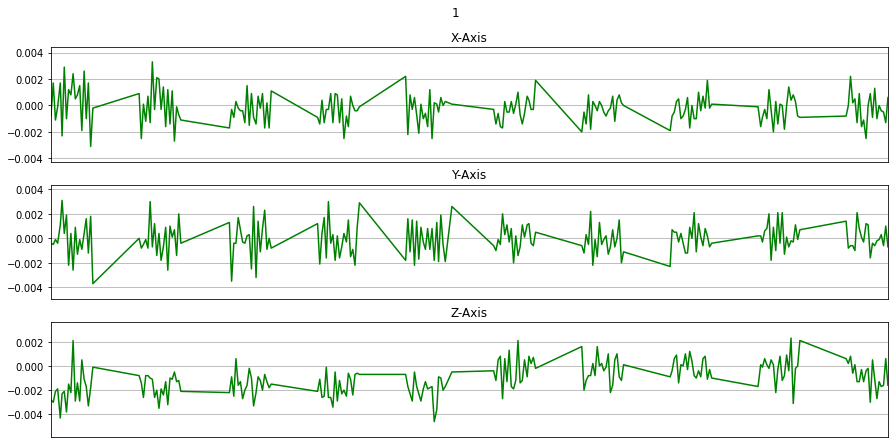

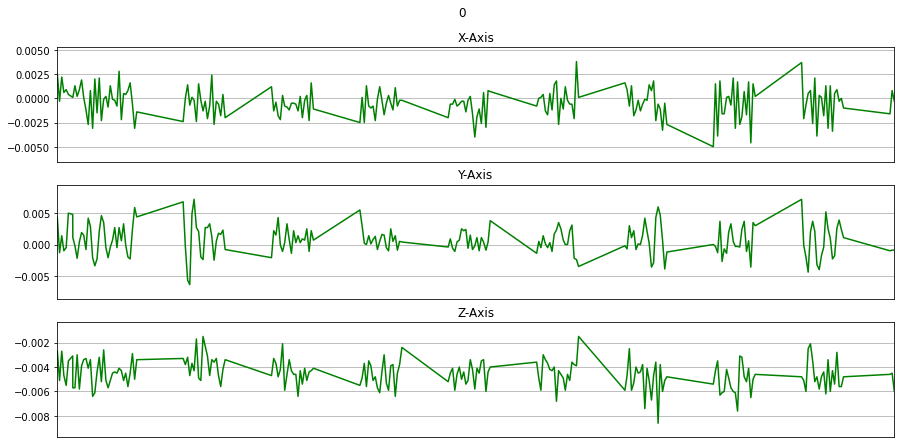

In [51]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time_acc'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time_acc'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time_acc'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

fs = 20 # Frame Size for sliding window

for tac in tacs:
    data_for_plot = data[(data['tac'] == tac)][:fs*10]
    plot_activity(tac, data_for_plot)

## Dropping the time_acc column as well for training model

In [52]:
df = data.drop(['time_acc'], axis = 1).copy()
df.head()

,tac,x,y,z
0,1,-0.0008,-0.0004,-0.0028
1,1,0.0017,-0.0005,-0.0030
2,1,-0.0011,-0.0001,-0.0021
3,1,-0.0001,-0.0004,-0.0019
4,1,0.0017,0.0011,-0.0043


## Using LabelEncoder library to label data

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
label = LabelEncoder()
df['label'] = label.fit_transform(df['tac'])
df.head()

,tac,x,y,z,label
0,1,-0.0008,-0.0004,-0.0028,1
1,1,0.0017,-0.0005,-0.0030,1
2,1,-0.0011,-0.0001,-0.0021,1
3,1,-0.0001,-0.0004,-0.0019,1
4,1,0.0017,0.0011,-0.0043,1


In [55]:
label.classes_

array([0, 1])

## Standardizing Data into X and Y for training and Testing

In [56]:
X = df[['x', 'y', 'z']]
y = df['label']

In [57]:
X

,x,y,z
0,-0.0008,-0.0004,-0.0028
1,0.0017,-0.0005,-0.0030
2,-0.0011,-0.0001,-0.0021
3,-0.0001,-0.0004,-0.0019
4,0.0017,0.0011,-0.0043
...,...,...,...
96387,-0.0571,-0.0671,-0.0038
96388,-0.0984,-0.0623,0.0460
96389,-0.0952,-0.0038,0.0687
96390,-0.0744,0.0052,0.0751


In [58]:
y

0        1
1        1
2        1
3        1
4        1
        ..
96387    0
96388    0
96389    0
96390    0
96391    0
Name: label, Length: 192784, dtype: int64

## Using the StandardScaler function to calculate z-score values for x, y, z and normalize the 3 readings

In [59]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.01389407, -0.04862467,  0.00304169],
       [ 0.00121714, -0.04924156,  0.00161208],
       [-0.01570742, -0.046774  ,  0.00804533],
       ...,
       [-0.58449341, -0.069599  ,  0.51412765],
       [-0.45876813, -0.01407872,  0.5598752 ],
       [-0.16500618,  0.14137809,  0.59347106]])

## Appending the scaled values to another DataFrame

In [60]:
scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,-0.013894,-0.048625,0.003042,1
1,0.001217,-0.049242,0.001612,1
2,-0.015707,-0.046774,0.008045,1
3,-0.009663,-0.048625,0.009475,1
4,0.001217,-0.039371,-0.007680,1
...,...,...,...,...
192779,-0.354199,-0.460092,-0.004106,0
192780,-0.603836,-0.430481,0.351867,0
192781,-0.584493,-0.069599,0.514128,0
192782,-0.458768,-0.014079,0.559875,0


## Preparing the Frame for Input Size of the Tensor

In [61]:
import scipy.stats as stats

In [63]:
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [64]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [65]:
X, y = get_frames(scaled_X, frame_size, hop_size)

## Checking frames inside X and y

In [66]:
X

array([[[-1.38940715e-02,  1.21713978e-03, -1.57074169e-02],
        [-9.66293236e-03,  1.21713978e-03, -2.29607983e-02],
        [ 8.47052121e-03, -1.51029684e-02, -1.80510248e-03],
        ...,
        [ 6.61571829e-03,  8.76013489e-03,  5.18610723e-03],
        [ 1.87674123e-02,  1.51933847e-02,  5.90091276e-03],
        [ 1.80526068e-02,  1.87674123e-02,  1.80526068e-02]],

       [[-1.93341076e-02, -1.08718293e-02, -1.44985200e-02],
        [-7.24513855e-03, -1.02673808e-02, -1.14762777e-02],
        [-1.14762777e-02, -1.69163138e-02,  8.24287794e-06],
        ...,
        [ 3.80671617e-02,  1.30489681e-02,  1.44785791e-02],
        [ 2.66302732e-02,  1.66229957e-02,  2.87746898e-02],
        [ 2.44858566e-02,  2.80598842e-02,  2.16266345e-02]],

       [[ 4.23938204e-03, -2.23563498e-02, -4.22289629e-03],
        [-1.08718293e-02, -5.43179319e-03, -1.32896231e-02],
        [-2.17519014e-02, -8.45403545e-03, -1.51029684e-02],
        ...,
        [ 1.73378013e-02,  1.59081902e-02,

In [67]:
y

array([1, 1, 1, ..., 0, 0, 0])

## Checking shape of X and y

In [68]:
X.shape, y.shape

((4818, 80, 3), (4818,))

# 2. Model development and Training

## Splitting X and y into train and test

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

## Checking size of our splits

In [70]:
X_train.shape, X_test.shape

((3854, 80, 3), (964, 80, 3))

## Checking input tensor size

In [71]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

## Reshaping our train and test data for 2D Convolutional Model

In [72]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [73]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

## Building a 2D Convolutional Neural Network Model

In [74]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='softmax'))

In [75]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 79, 2, 16)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 78, 1, 32)         2080      
                                                                 
 dropout (Dropout)           (None, 78, 1, 32)         0         
                                                                 
 flatten (Flatten)           (None, 2496)              0         
                                                                 
 dense (Dense)               (None, 128)               319616    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               1

## Training our CNN Model

In [77]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 20, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10
193/193 [==============================] - 3s 11ms/step - loss: 0.9905 - accuracy: 0.6072 - val_loss: 0.5862 - val_accuracy: 0.7106
Epoch 2/10
193/193 [==============================] - 2s 10ms/step - loss: 0.5318 - accuracy: 0.7408 - val_loss: 0.4735 - val_accuracy: 0.7894
Epoch 3/10
193/193 [==============================] - 2s 10ms/step - loss: 0.4425 - accuracy: 0.8108 - val_loss: 0.3953 - val_accuracy: 0.8527
Epoch 4/10
193/193 [==============================] - 2s 10ms/step - loss: 0.3584 - accuracy: 0.8490 - val_loss: 0.3469 - val_accuracy: 0.8631
Epoch 5/10
193/193 [==============================] - 2s 10ms/step - loss: 0.3202 - accuracy: 0.8718 - val_loss: 0.3037 - val_accuracy: 0.8869
Epoch 6/10
193/193 [==============================] - 2s 10ms/step - loss: 0.2692 - accuracy: 0.8936 - val_loss: 0.2790 - val_accuracy: 0.9015
Epoch 7/10
193/193 [==============================] - 2s 10ms/step - loss: 0.2472 - accuracy: 0.9063 - val_loss: 0.2779 - val_accuracy: 0.9108

## Plotting Learning Curve

In [78]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

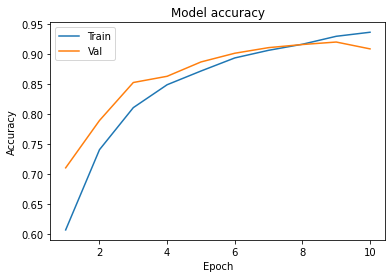

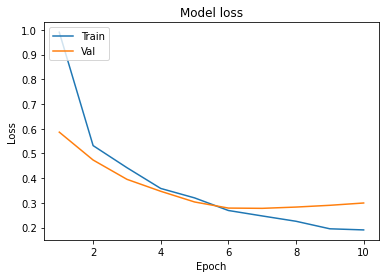

In [79]:
plot_learningCurve(history, 10)

## Plotting ROC Curve

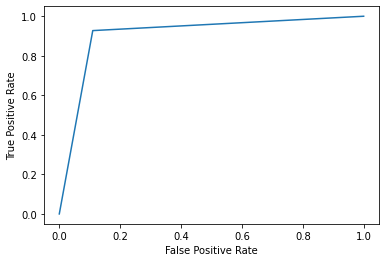

In [86]:
from sklearn import metrics

predict_prob=model.predict(X_test)
predict_classes=np.argmax(predict_prob,axis=1)[::1]
fpr, tpr, _ = metrics.roc_curve(y_test,  predict_classes)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [95]:
! pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


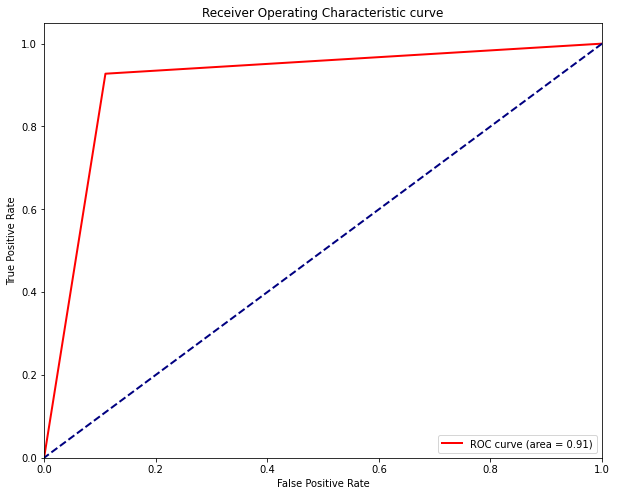

In [99]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
fpr, tpr, _ = metrics.roc_curve(y_test,  predict_classes)
roc_auc= auc(fpr, tpr)
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([1,0], [1,0], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic curve")
plt.legend(loc = 'lower right')

## Confusion Matrix

In [102]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

cn_matrix = confusion_matrix(y_test, y_pred)

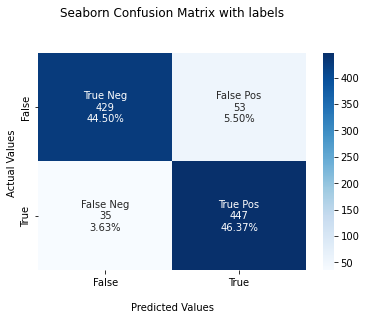

In [103]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cn_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       482
           1       0.89      0.93      0.91       482

    accuracy                           0.91       964
   macro avg       0.91      0.91      0.91       964
weighted avg       0.91      0.91      0.91       964



## Exporting Model to disk

In [105]:
model.save_weights('model.h5') # model weight
json_string = model.to_json() # model architecture
open('model.json', 'w').write(json_string)

2713

# 3. Setting up code for inference

In [106]:
test_data = pd.read_csv("new_test.csv", index_col=False)

## Removing useless columns from our data

In [107]:
test_data.drop("pid", axis=1, inplace=True)
test_data.drop("range_start_tac", axis=1, inplace=True)
test_data.drop("range_end_tac", axis=1, inplace=True)
test_data.drop("time_acc_sec", axis=1, inplace=True)
test_data.drop("time_acc", axis=1, inplace=True)
test_data.drop("tac", axis=1, inplace=True)

In [108]:
test_data

,x,y,z
0,-0.0023,0.0128,-0.0035
1,0.0007,0.0064,-0.0127
2,0.0009,0.0037,-0.0011
3,-0.0063,-0.0001,0.0060
4,-0.0037,-0.0019,-0.0014
...,...,...,...
26825,-0.0311,-0.0173,0.0568
26826,-0.0209,-0.0157,0.0449
26827,0.0591,-0.0065,-0.0907
26828,-0.0047,-0.0067,-0.0559


In [117]:
test_data = test_data.head(600) # must ensure that the value is a multiple of 20
test_data

,x,y,z
0,-0.0023,0.0128,-0.0035
1,0.0007,0.0064,-0.0127
2,0.0009,0.0037,-0.0011
3,-0.0063,-0.0001,0.0060
4,-0.0037,-0.0019,-0.0014
...,...,...,...
595,0.0084,-0.0104,0.0339
596,0.0143,-0.0446,-0.0250
597,0.0416,0.0327,0.0028
598,-0.0024,0.0240,0.0373


## Preprocessing our test data

In [118]:
X_test_scaled = scaler.fit_transform(test_data)

In [119]:
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns = ['x', 'y', 'z'])

## Defining function to get frames for X Y Z value

In [120]:
def get_frames_inference(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        frames.append([x, y, z])

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)

    return frames

## Generating frames for inference

In [121]:
X_test_data = get_frames_inference(X_test_scaled, frame_size, hop_size)

In [122]:
X_test_data.shape

(13, 80, 3)

## Resizing test data to fit out model input

In [ ]:
X_test_data = X_test_data.reshape(X_test_data.shape[0],80,3,1)
X_test_data.shape

## Loading model from disk using Keras

In [123]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = keras.models.model_from_json(loaded_model_json)

model.load_weights("model.h5")

print("Loaded model from disk successfully")

Loaded model from disk successfully


## Running prediction

In [124]:
model_pred = model.predict(X_test_data)
y_pred = np.argmax(model_pred, axis=-1)
print(y_pred)

[0 1 1 1 1 0 0 1 0 0 1 1 1]


## Getting TAC class for our prediction

In [125]:
tac_inference = label.classes_[y_pred[0]]

In [126]:
if tac_inference == 1:
    print("Drunk")
else:
    print("Not Drunk")

Not Drunk
